# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Victor Hamzat</h2>

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,10)

In [3]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
data.describe()#gives statistical summary of the data.

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
data.isna().sum()#wow.No missing data!

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

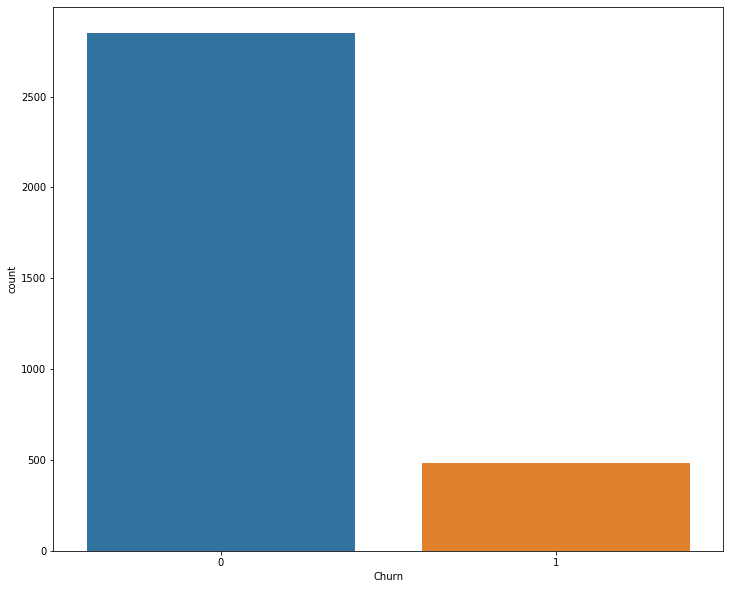

In [7]:
# Our label Distribution (countplot)
sns.countplot('Churn',data=data)

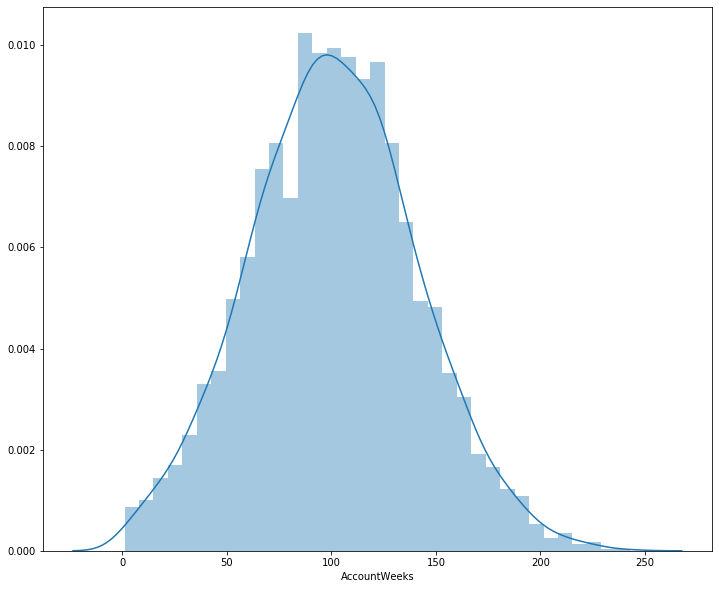

In [8]:
# Example EDA
sns.distplot(data['AccountWeeks'])

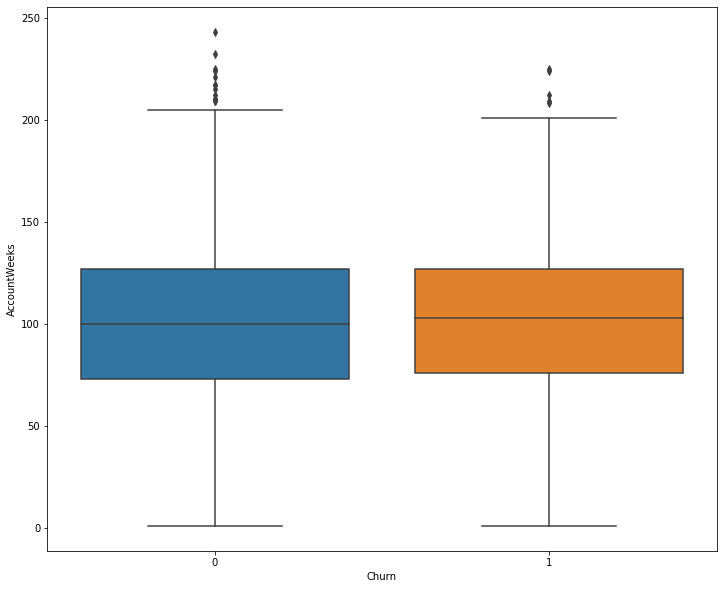

In [9]:
sns.boxplot(x='Churn',y='AccountWeeks',data=data)#Shows the distribution of the data

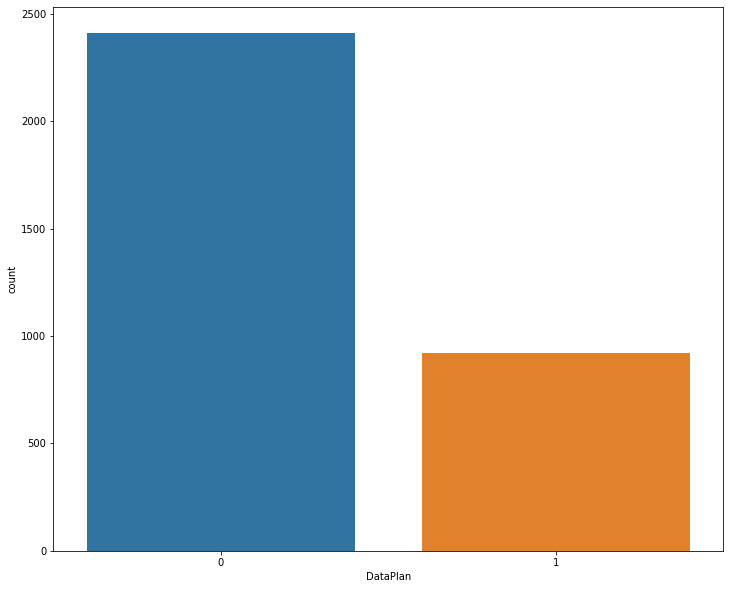

In [10]:
sns.countplot('DataPlan',data=data)

In [11]:
data.DataUsage.value_counts()# This is quit understandable. People with no dataplans have no or little Data Usage.

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
0.46       1
4.64       1
0.47       1
1.05       1
4.48       1
Name: DataUsage, Length: 174, dtype: int64

In [12]:
data[(data.DataUsage==0.00) &( data.DataPlan==0)]#To buttress line 10

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3322,1,62,1,0,0.0,4,321.1,105,78.0,13.28,11.5
3324,0,159,1,0,0.0,1,169.8,114,46.0,9.89,11.6
3327,0,79,1,0,0.0,2,134.7,98,40.0,9.49,11.8
3330,0,28,1,0,0.0,2,180.8,109,56.0,14.44,14.1


In [13]:
data.groupby('Churn')['AccountWeeks'].mean()#It looks like people who churned were old customers.

Churn
0    100.793684
1    102.664596
Name: AccountWeeks, dtype: float64

In [14]:
data.groupby('Churn')['MonthlyCharge'].mean()# people who left we probably overloaded with monthlycharge

Churn
0    55.816246
1    59.190062
Name: MonthlyCharge, dtype: float64

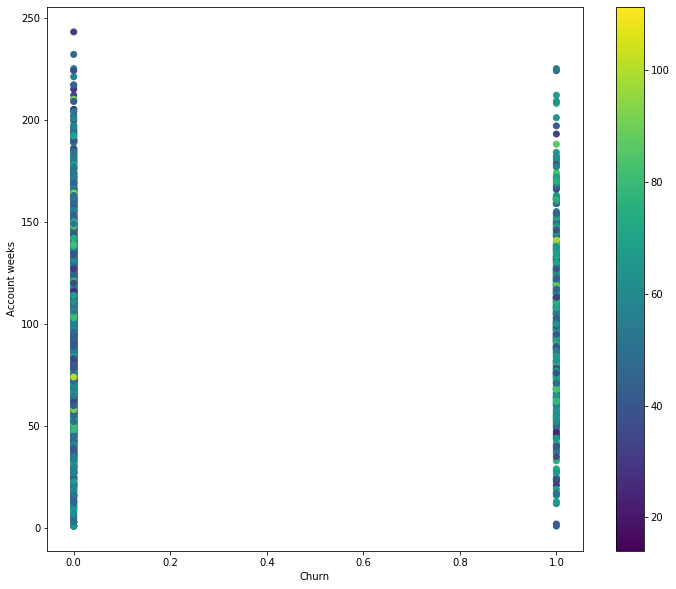

In [15]:
plt.scatter(x='Churn',y='AccountWeeks',data=data,c=data['MonthlyCharge'])
plt.xlabel('Churn')
plt.ylabel('Account weeks')
plt.colorbar()

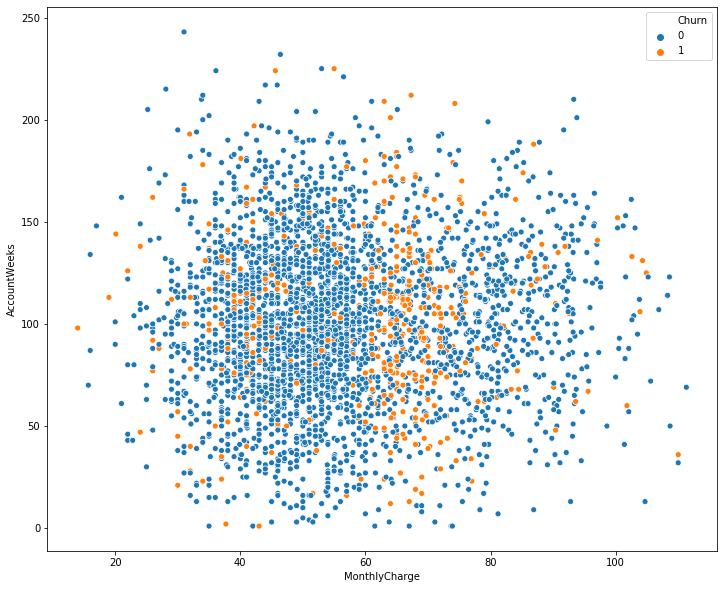

In [16]:
sns.scatterplot('MonthlyCharge','AccountWeeks',hue='Churn',data=data)

##### even though it is  not that vivid .we can see that most people who churn a long term customers with high monthly charges

In [17]:
pd.crosstab(data.Churn,data.CustServCalls).drop(0,axis=1).sum(axis=1)

Churn
0    2245
1     391
dtype: int64

okay this might be a little confussing. Let's not forget the ratio of each class.

In [18]:
pd.crosstab(data.Churn,data.CustServCalls).drop(0,axis=1).sum(axis=1)/data.Churn.value_counts()

Churn
0    0.787719
1    0.809524
dtype: float64

Now, this shows something.Most people who churn have more customer care calls(Meaning they had a lot more problems than others)

In [19]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


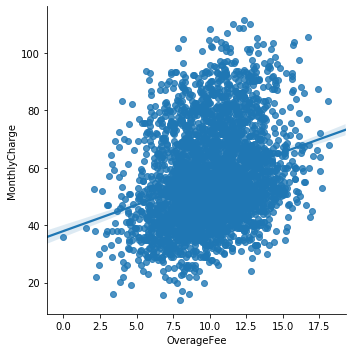

In [20]:
sns.lmplot('OverageFee','MonthlyCharge',data=data)

In [21]:
pd.crosstab(data.Churn,data.ContractRenewal)

ContractRenewal,0,1
Churn,,
0,186,2664
1,137,346


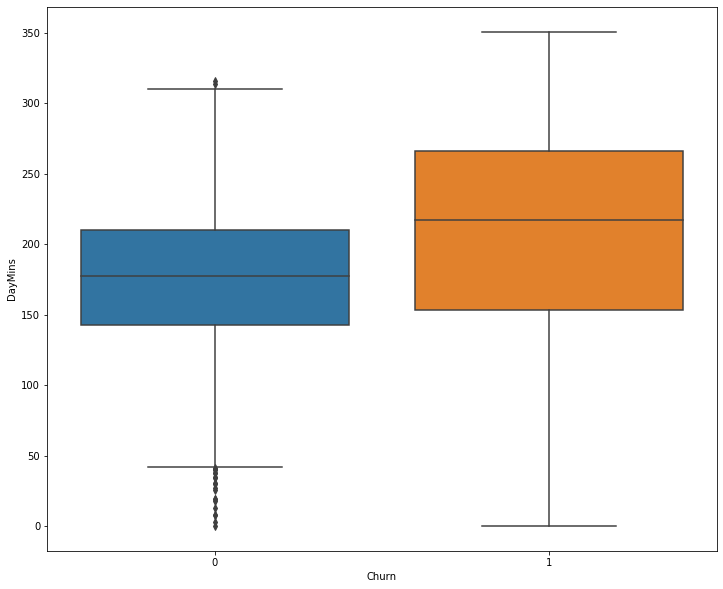

In [22]:
sns.boxplot(x='Churn',y='DayMins',data=data)

In [23]:
data.groupby('Churn')['DayCalls'].mean()

Churn
0    100.283158
1    101.335404
Name: DayCalls, dtype: float64

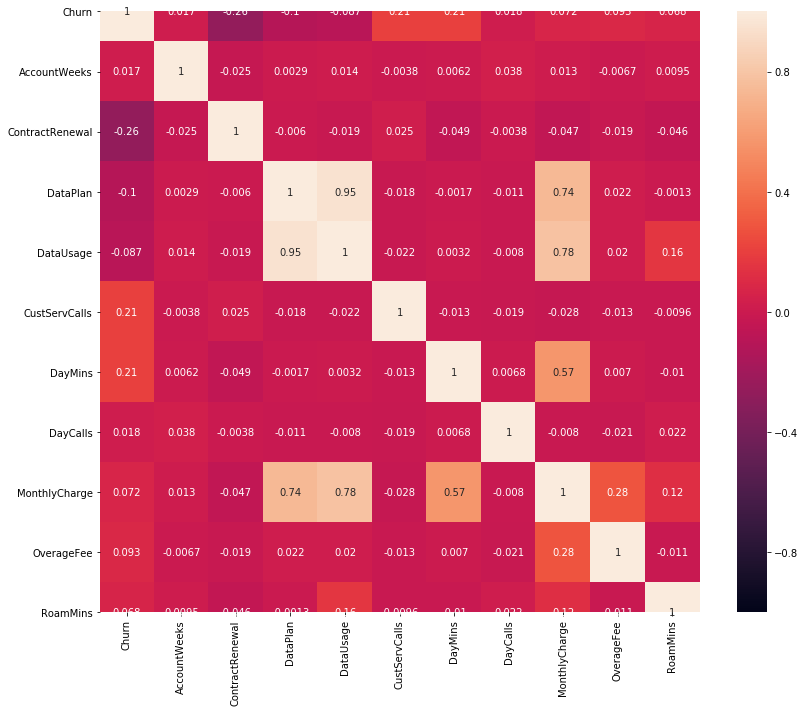

In [24]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.tight_layout()

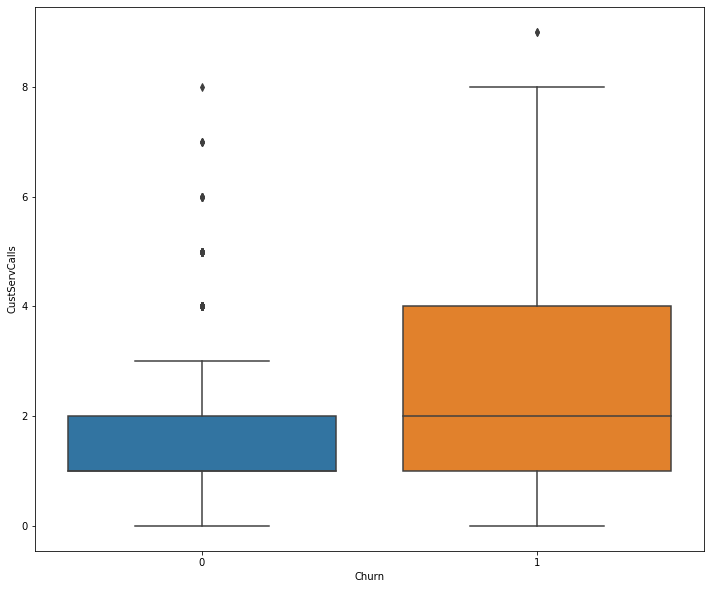

In [25]:
sns.boxplot('Churn','CustServCalls',data=data)

## Conclusion
##### from analysis it can be seen that the company loses it long term customers.Probably because of problems with the services they offer or bad customer treatment(Suggested by the CustServCall column).
##### The company should work on improving their and reduces cost of services optimally.

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [26]:
data.duplicated().sum()# they are no duplicated values

0

In [27]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


I'm Think of creating new feature named 'Month' that i will use in later analysis.
#averagely a month has 4 weeks right?

In [28]:
data['Month']=data['AccountWeeks']/4


In [29]:
data['TotalCharge']=data['Month']*data['MonthlyCharge']

In [30]:
data.groupby('Churn')['TotalCharge'].mean()

Churn
0    1408.528860
1    1519.941977
Name: TotalCharge, dtype: float64

same trend.Higher Charges leads to churn.

In [31]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Month,TotalCharge
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,32.00,2848.00
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,26.75,2193.50
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,34.25,1781.00
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,21.00,1197.00
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,18.75,768.75


In [32]:
data['CustServperMonth']=data.CustServCalls/data.Month

this gives the the ratio of customer care calls in a month

I am not sure what the column Overage fee means but I think it is CoverageFee.if it is this can be a good feature

In [33]:
data['CallCharges']=data.DayCalls*data.OverageFee

In [34]:
data.isna().sum()

Churn               0
AccountWeeks        0
ContractRenewal     0
DataPlan            0
DataUsage           0
CustServCalls       0
DayMins             0
DayCalls            0
MonthlyCharge       0
OverageFee          0
RoamMins            0
Month               0
TotalCharge         0
CustServperMonth    0
CallCharges         0
dtype: int64

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
X=data.drop(['Churn'],axis=1)
y=data.Churn
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

## Using Logistic regression

In [37]:
def validate(model,scaled=False,return_scaler=False):
    global X
    global X_test
    if scaled:
        scale=StandardScaler().fit(X)
        X=scale.transform(X)
        X_test=scale.transform(X_test)
    cross=cross_validate(model,X,y,cv=5,n_jobs=-1,return_estimator=True)
    print("Best score: ",max(cross['test_score']))
    y_pred=cross['estimator'][1].predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return cross['estimator'][1]

In [38]:
Log=LogisticRegression(C=1,solver='lbfgs')
Log=validate(Log)

Best score:  0.8723723723723724
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       865
           1       0.44      0.12      0.19       135

    accuracy                           0.86      1000
   macro avg       0.66      0.55      0.56      1000
weighted avg       0.82      0.86      0.82      1000

[[845  20]
 [119  16]]


Let's try scaling it

In [39]:
validate(Log,scaled=True)

Best score:  0.8680659670164917
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       865
           1       0.50      0.20      0.29       135

    accuracy                           0.86      1000
   macro avg       0.69      0.58      0.61      1000
weighted avg       0.83      0.86      0.84      1000

[[838  27]
 [108  27]]


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### The model does do well on the prediction. It is good at predicting the '0' class and not the '1' class(which is actually needed.

## Using RandomForest and Decision Trees

In [40]:
Rand=RandomForestClassifier(n_estimators=100,max_depth=12,random_state=9)
tree=DecisionTreeClassifier(max_depth=7,random_state=3)
forest=validate(Rand)
Tree=validate(tree)

Best score:  0.9474474474474475
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       865
           1       0.96      0.81      0.88       135

    accuracy                           0.97      1000
   macro avg       0.96      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000

[[860   5]
 [ 25 110]]
Best score:  0.9370314842578711
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       865
           1       0.90      0.70      0.79       135

    accuracy                           0.95      1000
   macro avg       0.93      0.85      0.88      1000
weighted avg       0.95      0.95      0.95      1000

[[855  10]
 [ 40  95]]


### Better!. Now we are talking.it has a high recall.

## Using Support Vector Machines

In [41]:
svm=SVC(C=3)
wow=validate(svm)

Best score:  0.9309309309309309
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       865
           1       0.87      0.64      0.74       135

    accuracy                           0.94      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.94      0.94      0.93      1000

[[852  13]
 [ 49  86]]


In [42]:
wow.score(X,y)

0.9381938193819382

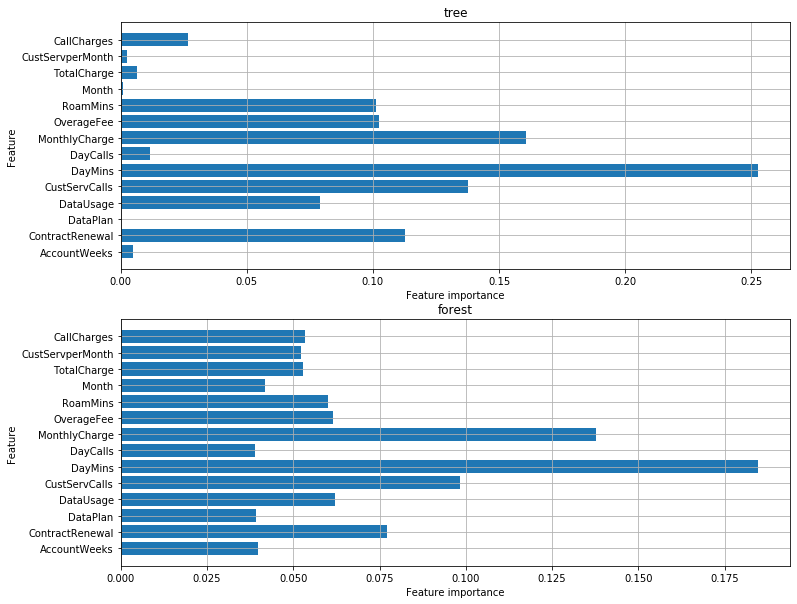

In [43]:
def plot_feature_importances(model):
    assert type(model)==dict
    fig,ax=plt.subplots(len(model))
    n_features = X_train.shape[1]
    for i,key in zip(ax.flatten(),model.keys()):
        i.set_yticks(np.arange(n_features))
        i.set_yticklabels(X_train.columns)
        i.barh(range(n_features),model[key].feature_importances_, align='center')
        i.set_xlabel("Feature importance")
        i.set_ylabel("Feature")
        i.set_title(key)
        i.grid()
plot_feature_importances({'tree':Tree,'forest':forest})

### We can see that even the newly added features also have high importance

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### I choose the Random Forest Classifier.
#### Reason:
- the random forest classifier has the highest accurarcy.
- the random forest algorithm has the highest  recall for the class '1',since we are predicting the class '1' majorly.

In [44]:
forest.score(X,y)

0.9738973897389739

In [45]:
forest.score(X_test,y_test)

0.97

In [46]:
confusion_matrix(y_test,forest.predict(X_test))#Random Forest

array([[860,   5],
       [ 25, 110]], dtype=int64)

In [47]:
confusion_matrix(y_test,Log.predict(X_test))#Logistic regression

array([[511, 354],
       [ 44,  91]], dtype=int64)

In [48]:
confusion_matrix(y_test,wow.predict(X_test))#Support vector Machines

array([[852,  13],
       [ 49,  86]], dtype=int64)

##### As we  can see the alogorithm performs better than others at predicting class '1'.